# Initialization Of Tensorboard and Removal of Old Logs
Kills all the tensorboard instances running on the system and then removes the log directory.
Starts a new instance of tensorboard with the default log directory

# Some Minor Points
    * Reset Default Tensorflow graph so that your cells don't clash before every computation 

In [1]:
default_tensorboard_logdir = "default_tensorboard_logs"

In [2]:
import os
!taskkill /IM tensorboard.exe /F
!rm {default_tensorboard_logdir} -r
os.system("start tensorboard --logdir=./"+default_tensorboard_logdir+" --host localhost --port 8088 &")

SUCCESS: The process "tensorboard.exe" with PID 13228 has been terminated.


rm: cannot remove 'default_tensorboard_logs': No such file or directory


0

# Start Your Notebook Here

#### Example Snippet to get you Started - Running Average
~~~~
import tensorflow as tf 
import numpy as np 



tf.reset_default_graph()

raw_data = np.random.normal(10, 1, 100)
const_val = np.mean(raw_data, dtype=np.float32)
true_avg = tf.Variable(const_val)

alpha = tf.constant(0.05)
curr_value = tf.placeholder(tf.float32, name="current_value")
prev_avg = tf.Variable(0.)
update_avg = alpha * curr_value + (1 - alpha) * prev_avg
curr_error = tf.abs(update_avg - true_avg)

avg_hist = tf.summary.scalar("running average", update_avg)
value_hist = tf.summary.scalar("incoming values", curr_value)
error_hist = tf.summary.scalar("Error History", curr_error)
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("./"+"default_tensorboard_logs")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    #sess.add_graph(sess.graph)
    for i in range(len(raw_data)):
        summary_str, curr_avg, curr_err = sess.run([merged, update_avg, curr_error], feed_dict={curr_value: raw_data[i]})
        sess.run(tf.assign(prev_avg, curr_avg))
        print(raw_data[i], curr_avg, curr_err)
        writer.add_summary(summary_str, i)
    sess.close()
~~~~        

# Linear Regression Chapter

## Simple Linear Regression

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

F:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
tf.reset_default_graph()
learning_rate = 0.01
training_epochs = 100

In [5]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

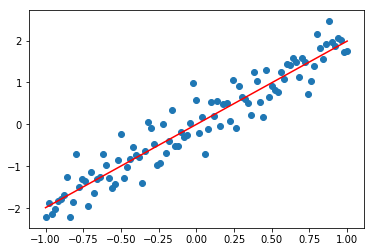

In [7]:
def model(X, w):
    return tf.multiply(X, w)

w = tf.Variable(0.0, name="weights")

y_model = model(X, w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X:x, Y:y})
    w_val = sess.run(w)
    sess.close()
    
    plt.scatter(x_train, y_train)
    y_learned = x_train * w_val
    plt.plot(x_train, y_learned,'r')
    plt.show()
    sess.close()

## Polynomial Model

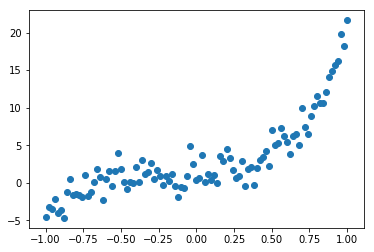

In [8]:
tf.reset_default_graph()
learning_rate = 0.01
training_epochs = 40

X_train = np.linspace(-1, 1, 101)
coeffs = [1, 2, 3, 4, 5, 6]
num_coeffs = 6
y_train = 0
for i in range(num_coeffs):
    y_train += coeffs[i] * np.power(X_train, i)

y_train += np.random.randn(*X_train.shape) * 1.5

plt.scatter(X_train, y_train)
plt.show()

In [9]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [10]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.pow(Y - y_model, 2)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

[1.1136284 1.5677352 3.8164177 5.2423115 3.0123858 5.7923293]


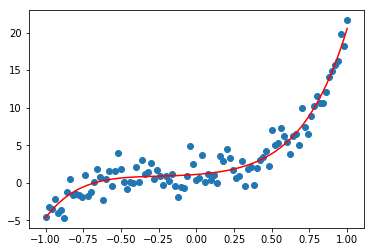

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        for (x,y) in zip(X_train, y_train):
            sess.run(train_op, feed_dict={X:x, Y:y})
    w_val = sess.run(w)
    print(w_val)
    sess.close()
    plt.scatter(X_train, y_train)
    output = 0
    for i in range(num_coeffs):
        output += w_val[i] * np.power(X_train, i)
    plt.plot(X_train, output, 'r')
    plt.show()

## Polynomial Regression with Regularization

In [24]:
from sklearn.model_selection import train_test_split

learning_rate = 0.001
training_epochs = 2000
reg_lambda = 0.05

X_dataset = np.linspace(-1, 1, 1000)
num_coeffs = 12
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(X_dataset, i)
y_dataset += np.random.randn(*X_dataset.shape) * 0.3

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.3)

reg_lambda:  0.05
final cost:  0.14886725


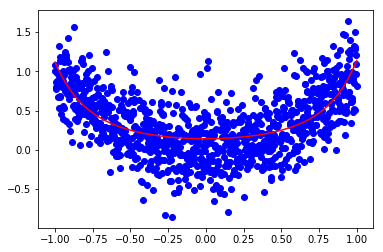

In [25]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
 tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
 2*x_train.size)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(training_epochs):
        sess.run(train_op, feed_dict={X:X_train, Y:y_train})
    final_cost = sess.run(cost, feed_dict={X:X_test, Y:y_test})
    w_val = sess.run(w)
    print("reg_lambda: ", reg_lambda)
    print("final cost: ", final_cost)
    sess.close()
    plt.scatter(X_dataset, y_dataset, c="b")
    output = 0
    for i in range(num_coeffs):
        output += w_val[i] * np.power(X_dataset, i)
    plt.plot(X_dataset, output, 'r')
    plt.show()